In [1]:
# import liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics  import classification_report

In [2]:
# import data
data = pd.read_csv("D:/DATA SCIENCE/1. Data Scientist/Assignment/13. decision tree/Company_Data.csv")

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.shape

(400, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
# by another step
#Creating dummy vairables for these three categorical column & dropping first dummy variable
data = pd.get_dummies(data,columns=['ShelveLoc','Urban','US'], drop_first=True)

In [8]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,1,0


In [12]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
data["Sales"] = pd.cut(data["Sales"], bins = [0.000000,5.390000,16.270000], labels = ["Risky", "Good"])

In [13]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,Good,138,73,11,276,120,42,17,0,0,1,1
1,Good,111,48,16,260,83,65,10,1,0,1,1
2,Good,113,35,10,269,80,59,12,0,1,1,1
3,Good,117,100,4,466,97,55,14,0,1,1,1
4,Risky,141,64,3,340,128,38,13,0,0,1,0


In [14]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
data = pd.get_dummies(data,columns = ["Sales"],drop_first=True)

In [15]:
data.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,Sales_Good
0,138,73,11,276,120,42,17,0,0,1,1,1
1,111,48,16,260,83,65,10,1,0,1,1,1
2,113,35,10,269,80,59,12,0,1,1,1,1
3,117,100,4,466,97,55,14,0,1,1,1,1
4,141,64,3,340,128,38,13,0,0,1,0,0


In [16]:
# Normalizing data, 
def norm_func(i): 
    x = (i-i.min())/(i.max()-i.min()) 
    return (x)

In [18]:
# Normalized data frame
data_norm = norm_func(data.iloc[:,0:])
data_norm.head(10)

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes,Sales_Good
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875,0.0,0.0,1.0,1.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000,1.0,0.0,1.0,1.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250,0.0,1.0,1.0,1.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500,0.0,1.0,1.0,1.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375,0.0,0.0,1.0,0.0,0.0
5,0.479592,0.929293,0.448276,0.983968,0.287425,0.963636,0.750,0.0,0.0,0.0,1.0,1.0
6,0.387755,0.848485,0.000000,0.070140,0.502994,0.836364,0.625,0.0,1.0,1.0,0.0,1.0
7,0.602041,0.606061,0.517241,0.831663,0.574850,0.763636,0.000,1.0,0.0,1.0,1.0,1.0
8,0.561224,0.898990,0.000000,0.196393,0.598802,0.927273,0.000,0.0,1.0,0.0,0.0,1.0
9,0.561224,0.929293,0.000000,0.242485,0.598802,0.927273,0.875,0.0,1.0,0.0,1.0,0.0


In [19]:
# declaring feature and target
array = data_norm.values
x = array[:,0:10]
y = array[:,-1]

In [20]:
x

array([[0.62244898, 0.52525253, 0.37931034, ..., 0.        , 0.        ,
        1.        ],
       [0.34693878, 0.27272727, 0.55172414, ..., 1.        , 0.        ,
        1.        ],
       [0.36734694, 0.14141414, 0.34482759, ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.86734694, 0.05050505, 0.4137931 , ..., 0.        , 1.        ,
        1.        ],
       [0.23469388, 0.58585859, 0.24137931, ..., 0.        , 0.        ,
        1.        ],
       [0.58163265, 0.16161616, 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [21]:
y

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1.

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.7, random_state= 1)

In [112]:
# Creating model testing 
from sklearn.ensemble import RandomForestClassifier
forest_new = RandomForestClassifier(n_estimators=10,max_depth=8,min_samples_split=40,criterion='gini')  # n_estimators is the number of decision trees
forest_new.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=40, n_estimators=10)

In [113]:
print('Train accuracy: {}'.format(forest_new.score(x_train, y_train)))
print('Test accuracy: {}'.format(forest_new.score(x_test, y_test)))

Train accuracy: 0.725
Test accuracy: 0.7642857142857142


In [114]:
# splitting data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.7, random_state= 1)

In [115]:
# Building decision tree classifier using entropy criteria
model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

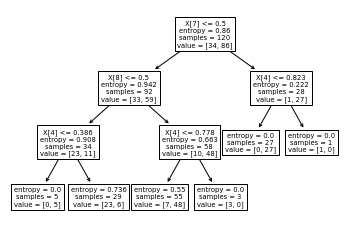

In [116]:
# plot the decision tree
tree.plot_tree(model);

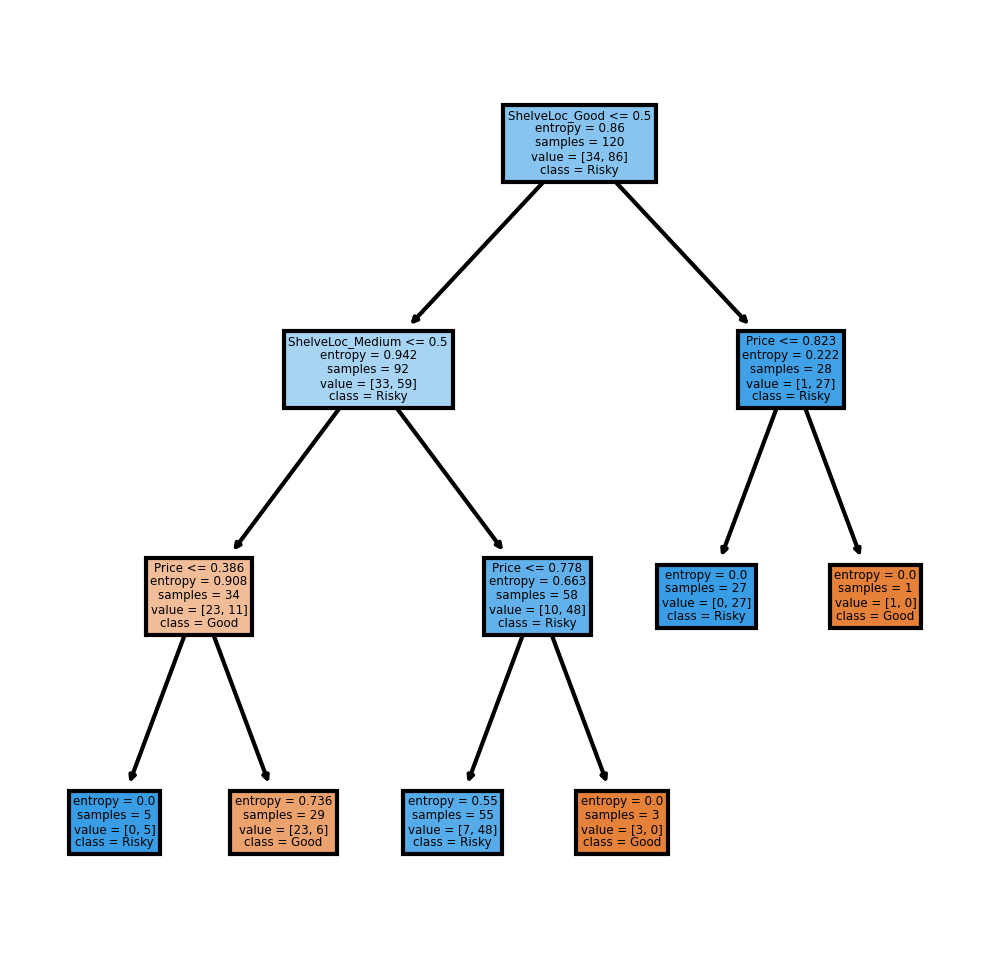

In [117]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','ShelveLoc_Good','ShelveLoc_Medium','Urban_Yes','US_Yes']
cn=['Good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);


In [ ]:
# Ans:
       # "ShelveLoc_Good" attributes causes high sale. 